In [1]:
import pandas as pd
import numpy as np

# import the ML algorithm
from sklearn.tree import DecisionTreeClassifier

# import libraries for model validation
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# load the data 
df_iris = pd.read_csv("/Users/nandaakriti/Downloads/iris.csv")
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = df_iris[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df_iris['Species']

In [4]:
# split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [5]:
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)

In [6]:
import graphviz 
from sklearn.tree import export_graphviz

In [7]:
feature_names = df_iris.drop(['Species','Id'] , axis=1).columns
class_names   = y.unique()

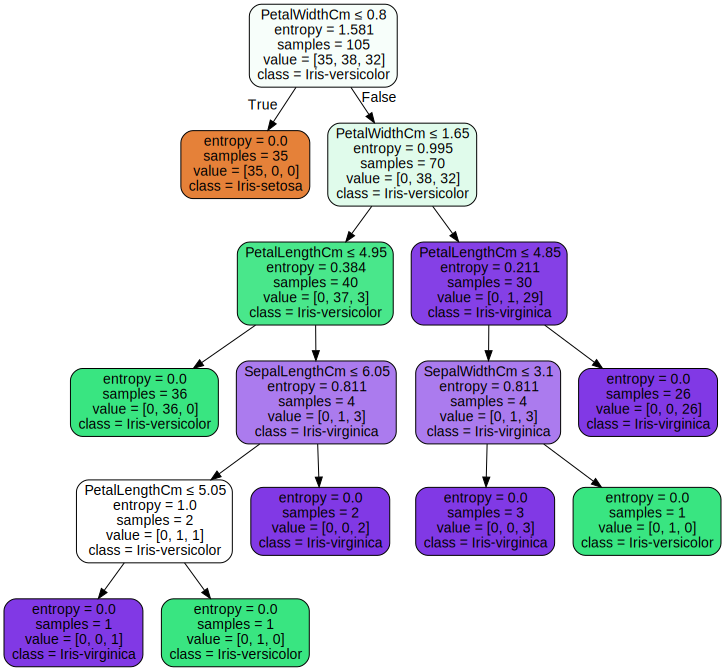

In [8]:
dot_data = export_graphviz(clf, 
                                out_file=None, 
                                feature_names=feature_names,  
                                class_names=class_names,  
                                filled=True, 
                                rounded=True,  
                                special_characters=True)  

graph = graphviz.Source(dot_data)  

graph.render("/Users/nandaakriti/Downloads/iris") 
graph 

In [9]:
# After being fitted, the model can then be used to predict the class of samples:
y_pred = clf.predict(X_test)

In [10]:
# accuracy score
metrics.accuracy_score(y_test, y_pred)

0.9777777777777777

In [11]:
# Check the importance of each feature
clf.feature_importances_

array([0.00749844, 0.01954303, 0.10362869, 0.86932984])

In [12]:
df_feature_importance = pd.DataFrame(data= {'col_name': X.columns, 'feature_importance': clf.feature_importances_})
df_feature_importance.sort_values(['feature_importance'], ascending=False)

,col_name,feature_importance
3,PetalWidthCm,0.869330
2,PetalLengthCm,0.103629
1,SepalWidthCm,0.019543
0,SepalLengthCm,0.007498


In [13]:
# Prediction on new data
new_data = np.array([1.5,.1,7.1,6.6]).reshape(1,-1)
clf.predict(new_data)

array(['Iris-virginica'], dtype=object)